In [2]:
import os, sys
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

#from importlib import reload  # Python 3.4+

import pickle
import pandas as pd

#force reimport
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text' in sys.modules:
    del sys.modules['pygents.text']
if 'pygents.plot' in sys.modules:
    del sys.modules['pygents.plot']
if 'pygents.token' in sys.modules:
    del sys.modules['pygents.token']
if 'pygents.token_plot' in sys.modules:
    del sys.modules['pygents.token_plot']


from pygents.token import *
from pygents.text import *
from pygents.util import *
from pygents.plot import plot_bars, plot_dict, matrix_plot
from pygents.token_plot import *

In [3]:
path = '../../nlp/corpora/Chinese/'
test_df = pd.read_csv(os.path.join(path,'magicdata/zh_en_ru_100/CORPUS_ZH_EN_RU.txt'),delimiter='\t')
test_texts = list(test_df['zh'])
print(len(test_texts))
test_df[['zh']]

100


,zh
0,然后医疗保险呢？就是我们家，不论是大人啊还是小孩都会去买一个保险
1,当他们买了保险的，按照保险合同的话，是要赔三十万的
2,需要意识到买了一个保险的重要性
3,其实这种现象是真的很普遍，因为比如说你买一个人身意外险你那个你买的越多你那个保额就越多
4,这代父母真的很有必要去买一个保险
...,...
95,蚂蚁保险不止有车险，我看到上面也有各种。
96,但是买房子呢，除了一笔首款付下去之后，每个月的贷款相当于租金
97,这种的投资性的理财，对于个人的财产来说，是具有一定风险
98,如果说你的投资方向正确，那么它是远比存款这一方面要具有更大的优势


In [4]:
for text in test_texts:
    print(text)

然后医疗保险呢？就是我们家，不论是大人啊还是小孩都会去买一个保险
当他们买了保险的，按照保险合同的话，是要赔三十万的
需要意识到买了一个保险的重要性
其实这种现象是真的很普遍，因为比如说你买一个人身意外险你那个你买的越多你那个保额就越多
这代父母真的很有必要去买一个保险
嗯，对现在就是说很提倡买保险
车一定要全款买，房子可以贷款买
可以去买保险，保险当然分为很多类
医疗保险还是很重要的
就是保险公司来出这一部分钱
相互宝，我不知道你有没有了解过，它是支付宝里面的一种保险
买房子其实也就是一个投资
你有没有去了解过平安保险公司的培训啊
如果要是存银行的话，利息利滚利是多少
这个保险在西方国家已经很成熟了
保险行业很多啊，你看它覆盖的面积特别广
但是，其实也是在鼓励你买商业保险和人寿保险
卖保险的都是靠的人脉
呃，你买的社保也是保险呀，然后你的车险也是保险呀
但是银行的钱，你如果是拿出来的话，属于是一种贷款
现在好像转向那个负利率
借银行的钱，我真的没试过
他是没有利息的，所以他就把它放出去，以后再收回来
如果是你征信不好的话，他也不会给钱你用
是他是贷款买的还是全款
嗯，他们就是就是有时候办一张银行卡的时候，程序特别多
各种银行，还有五大银行
国债券也算是证券的一种吗
其实做股票的话嗯相它是算是风险系数比较高的
嗯收益不会太高就跟银行利率是差不多的
然后就用来炒房用啊，等它升值了之后卖一套房，然后还清贷款，可能自己还赚了那个几十万
入投资入门的话，第一步就是说你要掌握基础知识
汇率的标价方式还有他的直接标价法和间接标价法
它始终是一种投资的行为，投资的模式，投资的方式
如果有闲钱呢买一套公寓来投资呢？
变成资金，投资其他的方面
有了贷款就有了压力，也就有了挣钱的动力，这个我也认同
方不方便开通网上银行啊
那你上次投资的钱从哪来的
银行的政策的改变让他们不能贷款了
保险公司呢它也有理财产品的
好像我们那个保险公司是两点八的利息保底
所以很多人对保险很反感
他们宁愿把那个钱去存银行吃利息
提前五年理财真好，因为理财本身就是一个很轻松的事情
就是你把你的生活费支出的一小部分作一个储蓄
债券基金里这种基金的话，它是收益是比较稳定的，就跟存定期一样，但是比定期的钱要多
它理论上可以开多少张这种承兑汇票
就是说我们每个人都应该有自己的理财方式，不管你是你理什么财不管你有多少钱
是

In [9]:
ngram_params = [[1],[2],[3],[1,2],[2,3],[1,2,3]]
thresholds = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
filter_thresholds = [0,0.0001,0.001,0.01,0.1]


In [6]:
ref_tokenizer = JebaTokenizer()
zh_lexicon_tokenizer = LexiconIndexedTokenizer(lexicon = list(pd.read_csv(os.path.join(path,'lexicon/chineselexicaldatabase2.1.txt'))['Word']))


/Users/akolonin/Documents/aigents/pygents/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3524: DtypeWarning: Columns (3,4,8,9,12,13,17,18,22,23,28,29,111,112,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
avg_f1 = evaluate_tokenizer_f1(test_texts,ref_tokenizer,zh_lexicon_tokenizer,debug=False)
print(avg_f1)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lb/1m7gbdp17h578qq48pbbtxf40000gn/T/jieba.cache
Loading model cost 0.699 seconds.
Prefix dict has been built successfully.


0.82


Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lb/1m7gbdp17h578qq48pbbtxf40000gn/T/jieba.cache
Loading model cost 1.000 seconds.
Prefix dict has been built successfully.


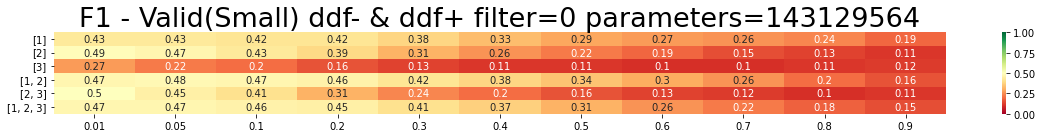

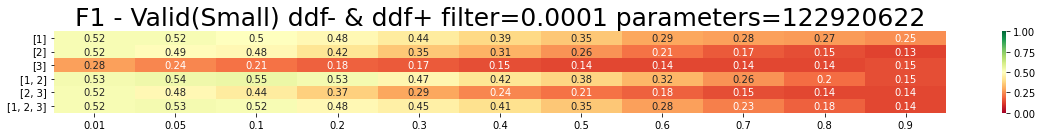

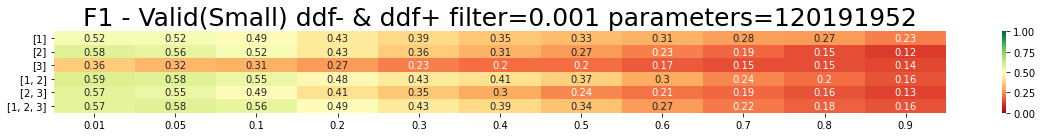

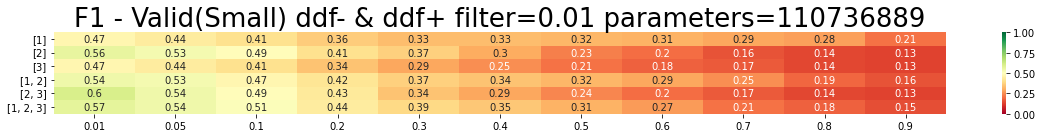

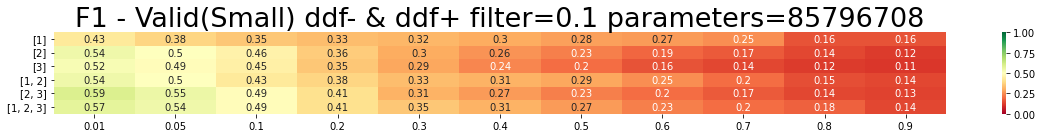

In [9]:
base = FreedomTokenizer(name='data/models/zh_valid_chars_3a',max_n=3,mode='chars',debug=False)
title = 'F1 - Valid(Small) ddf- & ddf+'
for filter_threshold in filter_thresholds:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'ddf-','ddf+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base


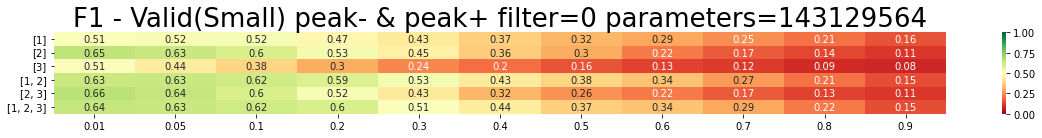

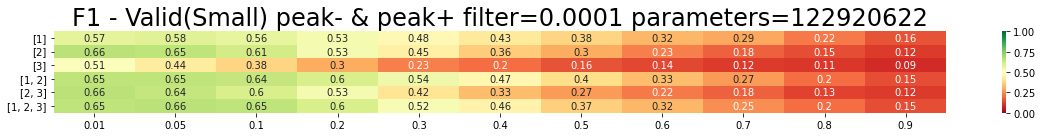

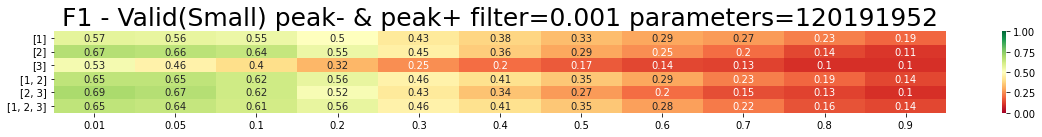

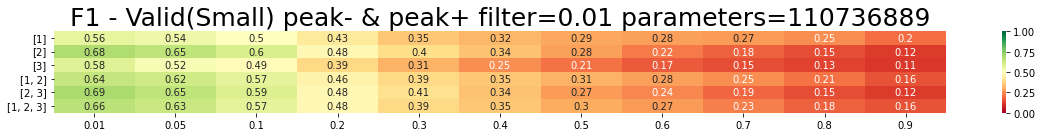

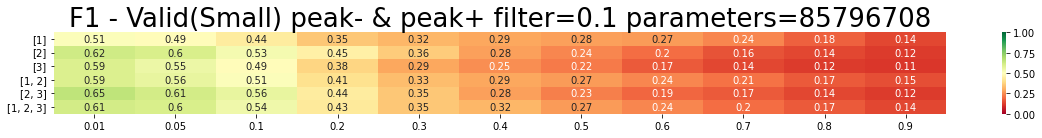

In [10]:
base = FreedomTokenizer(name='data/models/zh_valid_chars_3a',max_n=3,mode='chars',debug=False)
title = 'F1 - Valid(Small) peak- & peak+'
for filter_threshold in filter_thresholds:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'peak-','peak+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base

In [11]:
thresholds = [0.0005,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.4,0.9]
ngram_params = [[1],[2],[1,2]]


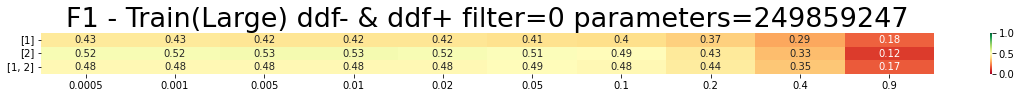

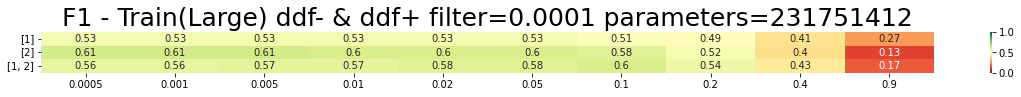

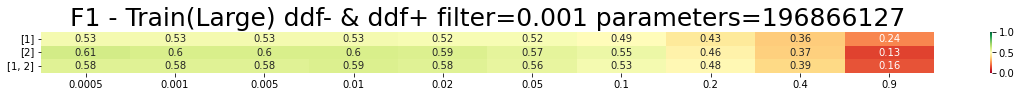

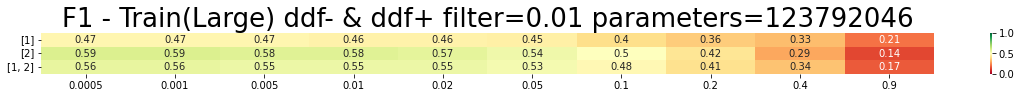

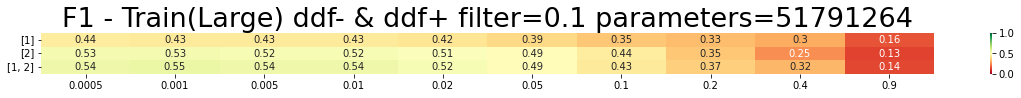

In [12]:
base = FreedomTokenizer(name='data/models/zh_train_chars_2a',max_n=2,mode='chars',debug=False)
title = 'F1 - Train(Large) ddf- & ddf+'
for filter_threshold in filter_thresholds:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'ddf-','ddf+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base


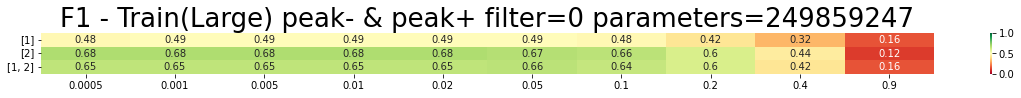

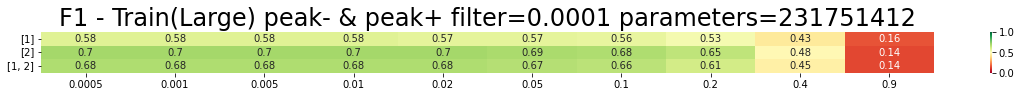

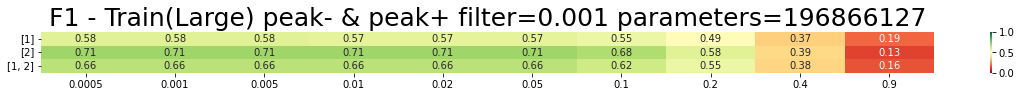

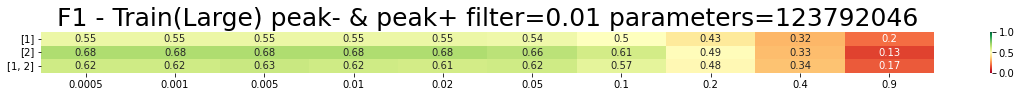

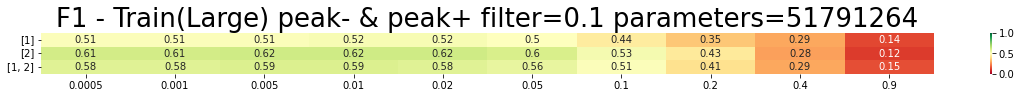

In [12]:
base = FreedomTokenizer(name='data/models/zh_train_chars_2a',max_n=2,mode='chars',debug=False)
title = 'F1 - Train(Large) peak- & peak+'
for filter_threshold in filter_thresholds:
    if filter_threshold > 0:
        model_compress_with_loss(base.model,filter_threshold)
    parameters = base.count_params()
    evaluate_freedom_tokenizer_options(test_texts,ref_tokenizer,FreedomBasedTokenizer(base,'peak-','peak+'),
        ngram_params,thresholds,title="{} filter={} parameters={}".format(title,filter_threshold,parameters))
del base


In [ ]:
#TODO all above
# - valid3 - DONE
# - train2 - DONE
# - valid3, train2 - peak-/peak+ - PROGRESS

# - train2 + valid2 - TODO
# - train3 - TODO
# - train3 + valid3 - TODO
# - news3
